In [21]:
# 텐서플로우는 자동 미분(주어진 입력 변수에 대한 연산의 gradient를 계산하는 것)
import tensorflow as tf
import numpy as np


In [22]:
x = tf.Variable(5.0)
w = tf.Variable(0.0)

@tf.function
def train_step():
    # GradientTape: 연산과정을 기억해 뒀다가 나중에 자동으로 미분(gradient)을 계산
    with tf.GradientsTape() as tape:
        y = tf.multiply(w, x) 
        loss = tf.square(tf.subtract(y, 50))
    grad = tape.gradient(loss, w)   # 자동 미분
    mu = 0.01   # 학습률
    w.assign_sub(mu * grad)
    return loss

for i in range(10):
    loss = train_step()
    print('{:1}, w:{:.5f}, loss:{:.5f}'.format(i, w.numpy(), loss.numpy()))

AttributeError: in user code:

    File "C:\Users\cheei\AppData\Local\Temp\ipykernel_22740\3431716884.py", line 7, in train_step  *
        with tf.GradientsTape() as tape:

    AttributeError: module 'tensorflow' has no attribute 'GradientsTape'


In [ ]:
# keras.optimizers 패키지에 있는 Adam, SGD, RMSprop ...사용
opti = tf.keras.optimizers.SGD(learning_rate=0.01)

x = tf.Variable(5.0)
w = tf.Variable(0.0)

@tf.function
def train_step():
    # GradientTape: 연산과정을 기억해 뒀다가 나중에 자동으로 미분(gradient)을 계산
    with tf.GradientTape() as tape:
        y = tf.multiply(w, x) 
        loss = tf.square(tf.subtract(y, 50))
    grad = tape.gradient(loss, w)   # 자동 미분

    opti.apply_gradients([(grad, w)])

    return loss

for i in range(10):
    loss = train_step()
    print('{:1}, w:{:.5f}, loss:{:.5f}'.format(i, w.numpy(), loss.numpy()))

0, w:5.00000, loss:2500.00000
1, w:7.50000, loss:625.00000
2, w:8.75000, loss:156.25000
3, w:9.37500, loss:39.06250
4, w:9.68750, loss:9.76562
5, w:9.84375, loss:2.44141
6, w:9.92188, loss:0.61035
7, w:9.96094, loss:0.15259
8, w:9.98047, loss:0.03815
9, w:9.99023, loss:0.00954


tf.Tensor(0.13738556, shape=(), dtype=float32)
tf.Tensor(0.10808636, shape=(), dtype=float32)
tf.Tensor(0.1078397, shape=(), dtype=float32)
tf.Tensor(0.107731745, shape=(), dtype=float32)
tf.Tensor(0.10763146, shape=(), dtype=float32)
tf.Tensor(0.10753771, shape=(), dtype=float32)
tf.Tensor(0.10745009, shape=(), dtype=float32)
tf.Tensor(0.107368216, shape=(), dtype=float32)
tf.Tensor(0.10729172, shape=(), dtype=float32)
tf.Tensor(0.10722017, shape=(), dtype=float32)
[np.float32(3.8895822), np.float32(2.3117867), np.float32(1.3923203), np.float32(0.85649526), np.float32(0.54423726), np.float32(0.3622635), np.float32(0.25621286), np.float32(0.19440635), np.float32(0.1583833), np.float32(0.13738556), np.float32(0.12514386), np.float32(0.11800474), np.float32(0.11383939), np.float32(0.11140685), np.float32(0.109984115), np.float32(0.10915001), np.float32(0.10865893), np.float32(0.10836766), np.float32(0.10819306), np.float32(0.10808636), np.float32(0.10801923), np.float32(0.10797529), np.f

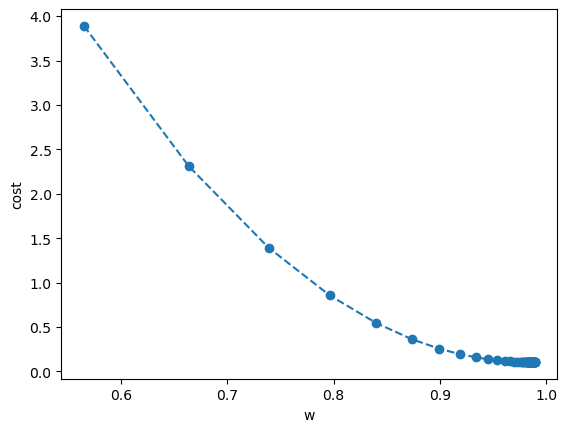

cost가 최소일 때 w:  [0.9893332]
cost가 최소일 때 b:  [0.08461335]
y_pred:  tf.Tensor([1.0739466 2.0632799 3.052613  4.0419464 5.0312796], shape=(5,), dtype=float32)


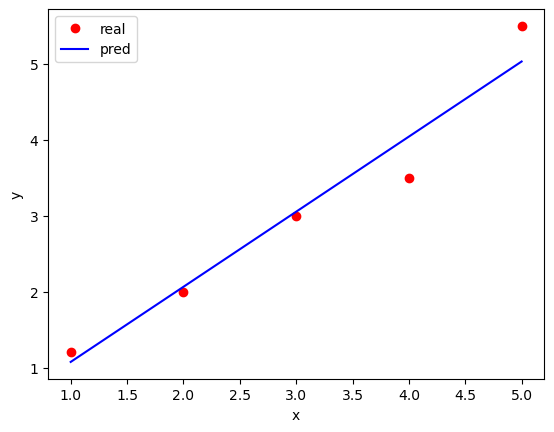

예측 결과:  [3.5472796 8.988613 ]


In [23]:
# 선형회귀 모형 작성
# keras.optimizers 패키지에 있는 Adam, SGD, RMSprop ...사용
opti = tf.keras.optimizers.SGD(learning_rate=0.01)

tf.random.set_seed(2)
w = tf.Variable(tf.random.normal((1, )))
b = tf.Variable(tf.random.normal((1, )))

@tf.function
def train_step3(x, y):
    # GradientTape: 연산과정을 기억해 뒀다가 나중에 자동으로 미분(gradient)을 계산
    with tf.GradientTape() as tape:
        hypo = tf.add(tf.multiply(w, x), b) 
        loss = tf.reduce_mean(tf.square(tf.subtract(hypo, y)))
    grad = tape.gradient(loss, [w, b])   # 자동 미분

    opti.apply_gradients(zip(grad, [w, b]))
    return loss

x = [1., 2., 3., 4., 5.]
y = [1.2, 2.0, 3.0, 3.5, 5.5]

w_vals = []
cost_vals = []

for i in range(1, 101):
    cost_val = train_step3(x, y)
    cost_vals.append(cost_val.numpy())
    w_vals.append(w.numpy())
    if i % 10 == 0:
        print(cost_val)
print(cost_vals)
print(w_vals)    

import matplotlib.pyplot as plt
plt.plot(w_vals, cost_vals, 'o--')
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

print('cost가 최소일 때 w: ', w.numpy())
print('cost가 최소일 때 b: ', b.numpy())

y_pred = tf.multiply(x, w) + b
print('y_pred: ', y_pred)

plt.plot(x, y, 'ro', label='real')
plt.plot(x, y_pred, 'b-', label='pred')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 새 값으로 예측하기
new_x = [3.5, 9.0]
new_pred = tf.multiply(new_x, w) + b
print('예측 결과: ', new_pred.numpy())
